In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install openpyxl

In [3]:
df=pd.read_csv("ipo_2010_2021.csv")

In [4]:
df.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
0,29-07-21,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46
2,19-07-21,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98
3,19-07-21,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79
4,07-07-21,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99


In [5]:
ipo_name_launch=df[['Date','IPO Name']]

In [6]:
ipo_name_launch.to_excel("ipo_name_launch.xlsx",header=['Date','IPO Name'],index=False)

In [7]:
df.drop(columns=['Profile','IPO Name'],inplace=True)

In [8]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    264 non-null    datetime64[ns]
 1   Issue Size (in crores)  264 non-null    float64       
 2   QIB                     264 non-null    float64       
 3   HNI                     264 non-null    float64       
 4   RII                     264 non-null    float64       
 5   Total                   264 non-null    float64       
 6   Issue                   264 non-null    float64       
 7   Listing Open            264 non-null    float64       
 8   Listing Close           264 non-null    float64       
 9   Listing Gains(%)        264 non-null    float64       
 10  CMP                     264 non-null    object        
 11  Current  Gains (%)      262 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memor

In [10]:
df['CMP']=df['CMP'].str.replace(",","").astype('float64')

In [11]:
df.head()

,Date,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
0,2021-07-29,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,2268.50,109.46
1,2021-07-23,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46
2,2021-07-19,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,1682.80,86.98
3,2021-07-19,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,1730.85,106.79
4,2021-07-07,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99


In [12]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [13]:
df.drop(columns=['CMP','Listing Close','Listing Gains(%)','Current  Gains (%)'],inplace=True)

In [14]:
df.tail()

,Date,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Month,Day
259,2010-02-19,0.00,0.52,1.52,2.26,1.12,75.0,70.00,2,19
260,2010-02-15,199.80,1.12,3.65,0.62,1.22,165.0,155.90,2,15
261,2010-02-15,56.25,0.99,16.60,6.25,5.17,75.0,88.00,2,15
262,2010-02-08,328.70,59.39,51.95,3.79,31.11,145.0,160.00,2,8
263,2010-02-03,189.80,48.44,106.02,11.08,43.22,165.0,178.35,2,3


In [15]:
nifty=pd.read_csv("NIFTY_2010_2021.csv")

In [16]:
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
2868,26-Jul-2021,15849.30,15893.35,15797.00,15824.45,267076679,19487.18
2869,27-Jul-2021,15860.50,15881.55,15701.00,15746.45,311012065,26117.34
2870,28-Jul-2021,15761.55,15767.50,15513.45,15709.40,318601589,26090.48
2871,29-Jul-2021,15762.70,15817.35,15737.80,15778.45,401584915,29460.54
2872,30-Jul-2021,15800.60,15862.80,15744.85,15763.05,400021237,30539.63


In [17]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2873 non-null   object 
 1   Open               2873 non-null   float64
 2   High               2873 non-null   float64
 3   Low                2873 non-null   float64
 4   Close              2873 non-null   float64
 5   Shares Traded      2873 non-null   int64  
 6   Turnover (Rs. Cr)  2873 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 157.2+ KB


In [18]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%b-%Y')

In [19]:
nifty.tail()


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
2868,2021-07-26,15849.30,15893.35,15797.00,15824.45,267076679,19487.18
2869,2021-07-27,15860.50,15881.55,15701.00,15746.45,311012065,26117.34
2870,2021-07-28,15761.55,15767.50,15513.45,15709.40,318601589,26090.48
2871,2021-07-29,15762.70,15817.35,15737.80,15778.45,401584915,29460.54
2872,2021-07-30,15800.60,15862.80,15744.85,15763.05,400021237,30539.63


In [20]:
vix=pd.read_csv("India VIX Historical Data_2010_2021.csv")
vix.drop('Vol.',axis=1,inplace=True)


In [21]:
vix['Date']=pd.to_datetime(vix['Date'],format='%d-%m-%Y')

In [22]:
vix = vix.sort_values('Date').reset_index(drop=True)


In [23]:
vix

,Date,Price,Open,High,Low,Change %
0,2010-01-04,23.6400,23.7900,24.9700,23.6000,1.29%
1,2010-01-05,22.2700,22.9800,23.2200,22.1200,-5.80%
2,2010-01-06,22.1200,21.7700,22.5500,21.7700,-0.67%
3,2010-01-07,22.5000,22.2200,22.9300,22.2200,1.72%
4,2010-01-08,22.5700,22.3700,22.7100,22.1900,0.31%
...,...,...,...,...,...,...
2864,2021-07-26,12.4500,11.7625,12.5400,10.3950,5.84%
2865,2021-07-27,13.2325,12.4500,13.5250,12.1025,6.29%
2866,2021-07-28,13.6925,13.2325,15.9800,11.3550,3.48%
2867,2021-07-29,12.9450,13.6925,13.6925,12.4350,-5.46%


In [24]:
for col in ['Open', 'High', 'Low', 'Price', 'Change %']:
    vix[f'Vix_Prev_{col}'] = vix[col].shift(1)

vix.drop(columns=['Open', 'High', 'Low', 'Price', 'Change %'],inplace=True)

In [25]:
vix.tail()

,Date,Vix_Prev_Open,Vix_Prev_High,Vix_Prev_Low,Vix_Prev_Price,Vix_Prev_Change %
2864,2021-07-26,11.8850,12.1150,11.5675,11.7625,-1.03%
2865,2021-07-27,11.7625,12.5400,10.3950,12.4500,5.84%
2866,2021-07-28,12.4500,13.5250,12.1025,13.2325,6.29%
2867,2021-07-29,13.2325,15.9800,11.3550,13.6925,3.48%
2868,2021-07-30,13.6925,13.6925,12.4350,12.9450,-5.46%


In [26]:
vix['Vix_Prev_Change %']=vix['Vix_Prev_Change %'].str.replace("%","").astype('float64')

In [27]:
vix.head()

,Date,Vix_Prev_Open,Vix_Prev_High,Vix_Prev_Low,Vix_Prev_Price,Vix_Prev_Change %
0,2010-01-04,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,23.79,24.97,23.60,23.64,1.29
2,2010-01-06,22.98,23.22,22.12,22.27,-5.80
3,2010-01-07,21.77,22.55,21.77,22.12,-0.67
4,2010-01-08,22.22,22.93,22.22,22.50,1.72


In [28]:
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
2868,2021-07-26,15849.30,15893.35,15797.00,15824.45,267076679,19487.18
2869,2021-07-27,15860.50,15881.55,15701.00,15746.45,311012065,26117.34
2870,2021-07-28,15761.55,15767.50,15513.45,15709.40,318601589,26090.48
2871,2021-07-29,15762.70,15817.35,15737.80,15778.45,401584915,29460.54
2872,2021-07-30,15800.60,15862.80,15744.85,15763.05,400021237,30539.63


In [29]:
#nifty.drop(columns='Turnover (Rs. Cr)',inplace=True)

In [30]:
for col in ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (Rs. Cr)']:
    nifty[f'Nifty_Prev_{col}'] = nifty[col].shift(1)

nifty.drop(columns=['Turnover (Rs. Cr)','Shares Traded','Open','Close','High','Low'],inplace=True)

In [31]:
nifty

,Date,Nifty_Prev_Open,Nifty_Prev_High,Nifty_Prev_Low,Nifty_Prev_Close,Nifty_Prev_Shares Traded,Nifty_Prev_Turnover (Rs. Cr)
0,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,5200.90,5238.45,5167.10,5232.20,148652424.0,6531.61
2,2010-01-06,5277.15,5288.35,5242.40,5277.90,240844424.0,7969.62
3,2010-01-07,5278.15,5310.85,5260.05,5281.80,216147837.0,7892.60
4,2010-01-08,5281.80,5302.55,5244.75,5263.10,181246734.0,6890.99
...,...,...,...,...,...,...,...
2868,2021-07-26,15856.80,15899.80,15768.40,15856.05,294098244.0,20685.82
2869,2021-07-27,15849.30,15893.35,15797.00,15824.45,267076679.0,19487.18
2870,2021-07-28,15860.50,15881.55,15701.00,15746.45,311012065.0,26117.34
2871,2021-07-29,15761.55,15767.50,15513.45,15709.40,318601589.0,26090.48


In [32]:
from functools import reduce

data_frames = [df, nifty, vix]
final_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='left'), data_frames)

In [33]:
final_df.head()

,Date,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Month,Day,...,Nifty_Prev_High,Nifty_Prev_Low,Nifty_Prev_Close,Nifty_Prev_Shares Traded,Nifty_Prev_Turnover (Rs. Cr),Vix_Prev_Open,Vix_Prev_High,Vix_Prev_Low,Vix_Prev_Price,Vix_Prev_Change %
0,2021-07-29,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,7,29,...,15767.50,15513.45,15709.40,318601589.0,26090.48,13.2325,15.980,11.3550,13.6925,3.48
1,2021-07-23,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,7,23,...,15834.80,15726.40,15824.05,265250867.0,23988.39,13.2050,13.205,11.7175,11.8850,-10.00
2,2021-07-19,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,7,19,...,15962.25,15882.60,15923.40,276298105.0,18758.13,12.2700,12.370,11.6250,11.7050,-4.60
3,2021-07-19,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,7,19,...,15962.25,15882.60,15923.40,276298105.0,18758.13,12.2700,12.370,11.6250,11.7050,-4.60
4,2021-07-07,800.00,2.64,1.36,4.40,3.25,296.0,360.0,7,7,...,15914.20,15801.00,15818.25,391410742.0,24456.05,12.0675,12.360,11.2900,12.2750,1.72


In [34]:
final_df = final_df.sort_values('Date').reset_index(drop=True)


In [35]:
final_df['days_since_start'] = (final_df['Date'] - final_df['Date'].min()).dt.days
final_df['DayOfWeek'] = final_df['Date'].dt.dayofweek   #Monday=0, Sunday=6
final_df['month_sin'] = np.sin(2 * np.pi * final_df['Month'] / 12)
final_df['month_cos'] = np.cos(2 * np.pi * final_df['Month'] / 12)

# Day of month cyclical feature
# We assume max 31 days in a month
final_df['day_sin'] = np.sin(2 * np.pi * final_df['Day'] / 31)
final_df['day_cos'] = np.cos(2 * np.pi * final_df['Day'] / 31)

# Day of week cyclical feature
# We have 7 days in a week
final_df['day_of_week_sin'] = np.sin(2 * np.pi * final_df['DayOfWeek'] / 7)
final_df['day_of_week_cos'] = np.cos(2 * np.pi * final_df['DayOfWeek'] / 7)
final_df.head()

,Date,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Month,Day,...,Vix_Prev_Price,Vix_Prev_Change %,days_since_start,DayOfWeek,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos
0,2010-02-03,189.80,48.44,106.02,11.08,43.22,165.0,178.35,2,3,...,26.69,4.22,0,2,0.866025,0.5,0.571268,0.820763,0.974928,-0.222521
1,2010-02-08,328.70,59.39,51.95,3.79,31.11,145.0,160.00,2,8,...,29.22,-2.83,5,0,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000
2,2010-02-15,199.80,1.12,3.65,0.62,1.22,165.0,155.90,2,15,...,28.81,-5.70,12,0,0.866025,0.5,0.101168,-0.994869,0.000000,1.000000
3,2010-02-15,56.25,0.99,16.60,6.25,5.17,75.0,88.00,2,15,...,28.81,-5.70,12,0,0.866025,0.5,0.101168,-0.994869,0.000000,1.000000
4,2010-02-19,0.00,0.52,1.52,2.26,1.12,75.0,70.00,2,19,...,29.76,2.48,16,4,0.866025,0.5,-0.651372,-0.758758,-0.433884,-0.900969


In [36]:
final_df.columns

Index(['Date', 'Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue',
       'Listing Open', 'Month', 'Day', 'Nifty_Prev_Open', 'Nifty_Prev_High',
       'Nifty_Prev_Low', 'Nifty_Prev_Close', 'Nifty_Prev_Shares Traded',
       'Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Open', 'Vix_Prev_High',
       'Vix_Prev_Low', 'Vix_Prev_Price', 'Vix_Prev_Change %',
       'days_since_start', 'DayOfWeek', 'month_sin', 'month_cos', 'day_sin',
       'day_cos', 'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [37]:
final_df['quarter'] = final_df['Date'].dt.quarter
final_df = pd.get_dummies(final_df, columns=['quarter'], prefix='quarter',drop_first=True,dtype='int')


In [38]:
pd.set_option("display.max_columns",None)
final_df

,Date,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Month,Day,Nifty_Prev_Open,Nifty_Prev_High,Nifty_Prev_Low,Nifty_Prev_Close,Nifty_Prev_Shares Traded,Nifty_Prev_Turnover (Rs. Cr),Vix_Prev_Open,Vix_Prev_High,Vix_Prev_Low,Vix_Prev_Price,Vix_Prev_Change %,days_since_start,DayOfWeek,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,quarter_2,quarter_3,quarter_4
0,2010-02-03,189.80,48.44,106.02,11.08,43.22,165.0,178.35,2,3,4907.85,4951.15,4814.10,4830.10,235090748.0,7927.05,24.7800,26.990,24.7800,26.6900,4.22,0,2,0.866025,0.500000,0.571268,0.820763,0.974928,-0.222521,0,0,0
1,2010-02-08,328.70,59.39,51.95,3.79,31.11,145.0,160.00,2,8,4712.75,4768.15,4712.75,4757.25,22091127.0,643.11,30.2100,30.210,29.1400,29.2200,-2.83,5,0,0.866025,0.500000,0.998717,-0.050649,0.000000,1.000000,0,0,0
2,2010-02-15,199.80,1.12,3.65,0.62,1.22,165.0,155.90,2,15,4757.25,4843.80,4757.25,4826.85,142638466.0,4917.21,28.6200,29.740,28.5400,28.8100,-5.70,12,0,0.866025,0.500000,0.101168,-0.994869,0.000000,1.000000,0,0,0
3,2010-02-15,56.25,0.99,16.60,6.25,5.17,75.0,88.00,2,15,4757.25,4843.80,4757.25,4826.85,142638466.0,4917.21,28.6200,29.740,28.5400,28.8100,-5.70,12,0,0.866025,0.500000,0.101168,-0.994869,0.000000,1.000000,0,0,0
4,2010-02-19,0.00,0.52,1.52,2.26,1.12,75.0,70.00,2,19,4915.10,4922.05,4873.70,4887.75,193513235.0,5763.98,27.6000,29.960,27.6000,29.7600,2.48,16,4,0.866025,0.500000,-0.651372,-0.758758,-0.433884,-0.900969,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2021-07-07,800.00,2.64,1.36,4.40,3.25,296.0,360.00,7,7,15813.75,15914.20,15801.00,15818.25,391410742.0,24456.05,12.0675,12.360,11.2900,12.2750,1.72,4172,2,-0.500000,-0.866025,0.988468,0.151428,0.974928,-0.222521,0,1,0
260,2021-07-19,963.28,93.18,73.01,4.89,43.48,837.0,1700.00,7,19,15958.35,15962.25,15882.60,15923.40,276298105.0,18758.13,12.2700,12.370,11.6250,11.7050,-4.60,4184,0,-0.500000,-0.866025,-0.651372,-0.758758,0.000000,1.000000,0,1,0
261,2021-07-19,1546.00,156.37,206.43,9.00,93.41,900.0,1784.40,7,19,15958.35,15962.25,15882.60,15923.40,276298105.0,18758.13,12.2700,12.370,11.6250,11.7050,-4.60,4184,0,-0.500000,-0.866025,-0.651372,-0.758758,0.000000,1.000000,0,1,0
262,2021-07-23,9375.00,51.79,32.96,7.45,38.25,76.0,115.00,7,23,15736.60,15834.80,15726.40,15824.05,265250867.0,23988.39,13.2050,13.205,11.7175,11.8850,-10.00,4188,4,-0.500000,-0.866025,-0.998717,-0.050649,-0.433884,-0.900969,0,1,0


In [39]:
final_df.columns

Index(['Date', 'Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue',
       'Listing Open', 'Month', 'Day', 'Nifty_Prev_Open', 'Nifty_Prev_High',
       'Nifty_Prev_Low', 'Nifty_Prev_Close', 'Nifty_Prev_Shares Traded',
       'Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Open', 'Vix_Prev_High',
       'Vix_Prev_Low', 'Vix_Prev_Price', 'Vix_Prev_Change %',
       'days_since_start', 'DayOfWeek', 'month_sin', 'month_cos', 'day_sin',
       'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'quarter_2',
       'quarter_3', 'quarter_4'],
      dtype='object')

In [40]:
real_df=final_df.drop(columns=['Date','Month','Day','Vix_Prev_Open', 'Vix_Prev_High','Vix_Prev_Low','DayOfWeek'])

In [41]:
real_df.head()

,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Nifty_Prev_Open,Nifty_Prev_High,Nifty_Prev_Low,Nifty_Prev_Close,Nifty_Prev_Shares Traded,Nifty_Prev_Turnover (Rs. Cr),Vix_Prev_Price,Vix_Prev_Change %,days_since_start,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,quarter_2,quarter_3,quarter_4
0,189.80,48.44,106.02,11.08,43.22,165.0,178.35,4907.85,4951.15,4814.10,4830.10,235090748.0,7927.05,26.69,4.22,0,0.866025,0.5,0.571268,0.820763,0.974928,-0.222521,0,0,0
1,328.70,59.39,51.95,3.79,31.11,145.0,160.00,4712.75,4768.15,4712.75,4757.25,22091127.0,643.11,29.22,-2.83,5,0.866025,0.5,0.998717,-0.050649,0.000000,1.000000,0,0,0
2,199.80,1.12,3.65,0.62,1.22,165.0,155.90,4757.25,4843.80,4757.25,4826.85,142638466.0,4917.21,28.81,-5.70,12,0.866025,0.5,0.101168,-0.994869,0.000000,1.000000,0,0,0
3,56.25,0.99,16.60,6.25,5.17,75.0,88.00,4757.25,4843.80,4757.25,4826.85,142638466.0,4917.21,28.81,-5.70,12,0.866025,0.5,0.101168,-0.994869,0.000000,1.000000,0,0,0
4,0.00,0.52,1.52,2.26,1.12,75.0,70.00,4915.10,4922.05,4873.70,4887.75,193513235.0,5763.98,29.76,2.48,16,0.866025,0.5,-0.651372,-0.758758,-0.433884,-0.900969,0,0,0


In [42]:
real_df.columns


Index(['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue',
       'Listing Open', 'Nifty_Prev_Open', 'Nifty_Prev_High', 'Nifty_Prev_Low',
       'Nifty_Prev_Close', 'Nifty_Prev_Shares Traded',
       'Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Price', 'Vix_Prev_Change %',
       'days_since_start', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'quarter_2', 'quarter_3',
       'quarter_4'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

split_index = int(len(df) * 0.8)

train_df = real_df.iloc[:split_index]
test_df = real_df.iloc[split_index:]
X_train=train_df.drop('Listing Open',axis=1)
y_train=train_df['Listing Open']
X_test=test_df.drop('Listing Open',axis=1)
y_test=test_df['Listing Open']

sc=StandardScaler()
X_train[['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue','Nifty_Prev_Open', 'Nifty_Prev_High', 'Nifty_Prev_Low','Nifty_Prev_Close', 'Nifty_Prev_Shares Traded','Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Price', 'Vix_Prev_Change %','days_since_start', 'month_sin', 'month_cos', 'day_sin', 'day_cos','day_of_week_sin', 'day_of_week_cos']]=sc.fit_transform(X_train[['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue','Nifty_Prev_Open', 'Nifty_Prev_High', 'Nifty_Prev_Low','Nifty_Prev_Close', 'Nifty_Prev_Shares Traded','Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Price', 'Vix_Prev_Change %','days_since_start', 'month_sin', 'month_cos', 'day_sin', 'day_cos','day_of_week_sin', 'day_of_week_cos']])
X_test[['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue','Nifty_Prev_Open', 'Nifty_Prev_High', 'Nifty_Prev_Low','Nifty_Prev_Close', 'Nifty_Prev_Shares Traded','Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Price', 'Vix_Prev_Change %','days_since_start', 'month_sin', 'month_cos', 'day_sin', 'day_cos','day_of_week_sin', 'day_of_week_cos']]=sc.transform(X_test[['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue','Nifty_Prev_Open', 'Nifty_Prev_High', 'Nifty_Prev_Low','Nifty_Prev_Close', 'Nifty_Prev_Shares Traded','Nifty_Prev_Turnover (Rs. Cr)', 'Vix_Prev_Price', 'Vix_Prev_Change %','days_since_start', 'month_sin', 'month_cos', 'day_sin', 'day_cos','day_of_week_sin', 'day_of_week_cos']])




In [44]:
models={
    "Decision Tree " : DecisionTreeRegressor(),
    "Random forest " : RandomForestRegressor(),
    " XG Boost "     : XGBRegressor(),
}

for key, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(key)
    print("r2 score:",r2_score(y_test,y_pred))
    print("mae:",mean_absolute_error(y_test,y_pred))
    print("mape:",mean_absolute_percentage_error(y_test,y_pred))
    print("rmse:",root_mean_squared_error(y_test,y_pred))
    print("---------------------------------")
    #if key != "Decision Tree ":
    #        importances = model.feature_importances_
    #        feature_names = X_train.columns  # assuming X_train is a DataFrame

    #        # Create a DataFrame for easy sorting
    #        feature_df = pd.DataFrame({
    #            'Feature': feature_names,
    #            'Importance': importances
    #        }).sort_values(by='Importance', ascending=False)

    #        # Plot
    #        plt.figure(figsize=(10, 6))
    #        plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
    #        plt.xlabel('Feature Importance')
    #        plt.title(key)
    #        plt.gca().invert_yaxis()  # Most important on top
    #        plt.tight_layout()
    #        plt.show()
    #else: print("dt")


Decision Tree 
r2 score: 0.7668298616159616
mae: 187.14150943396226
mape: 0.35135279457088414
rmse: 288.516494247435
---------------------------------
Random forest 
r2 score: 0.8248911090167188
mae: 149.08050943396225
mape: 0.2736851068556905
rmse: 250.02778874787288
---------------------------------
 XG Boost 
r2 score: 0.7567472525122824
mae: 162.48036820033812
mape: 0.21670157187843506
rmse: 294.6884119129117
---------------------------------


In [45]:
np.mean(y_test)

np.float64(636.4367924528302)

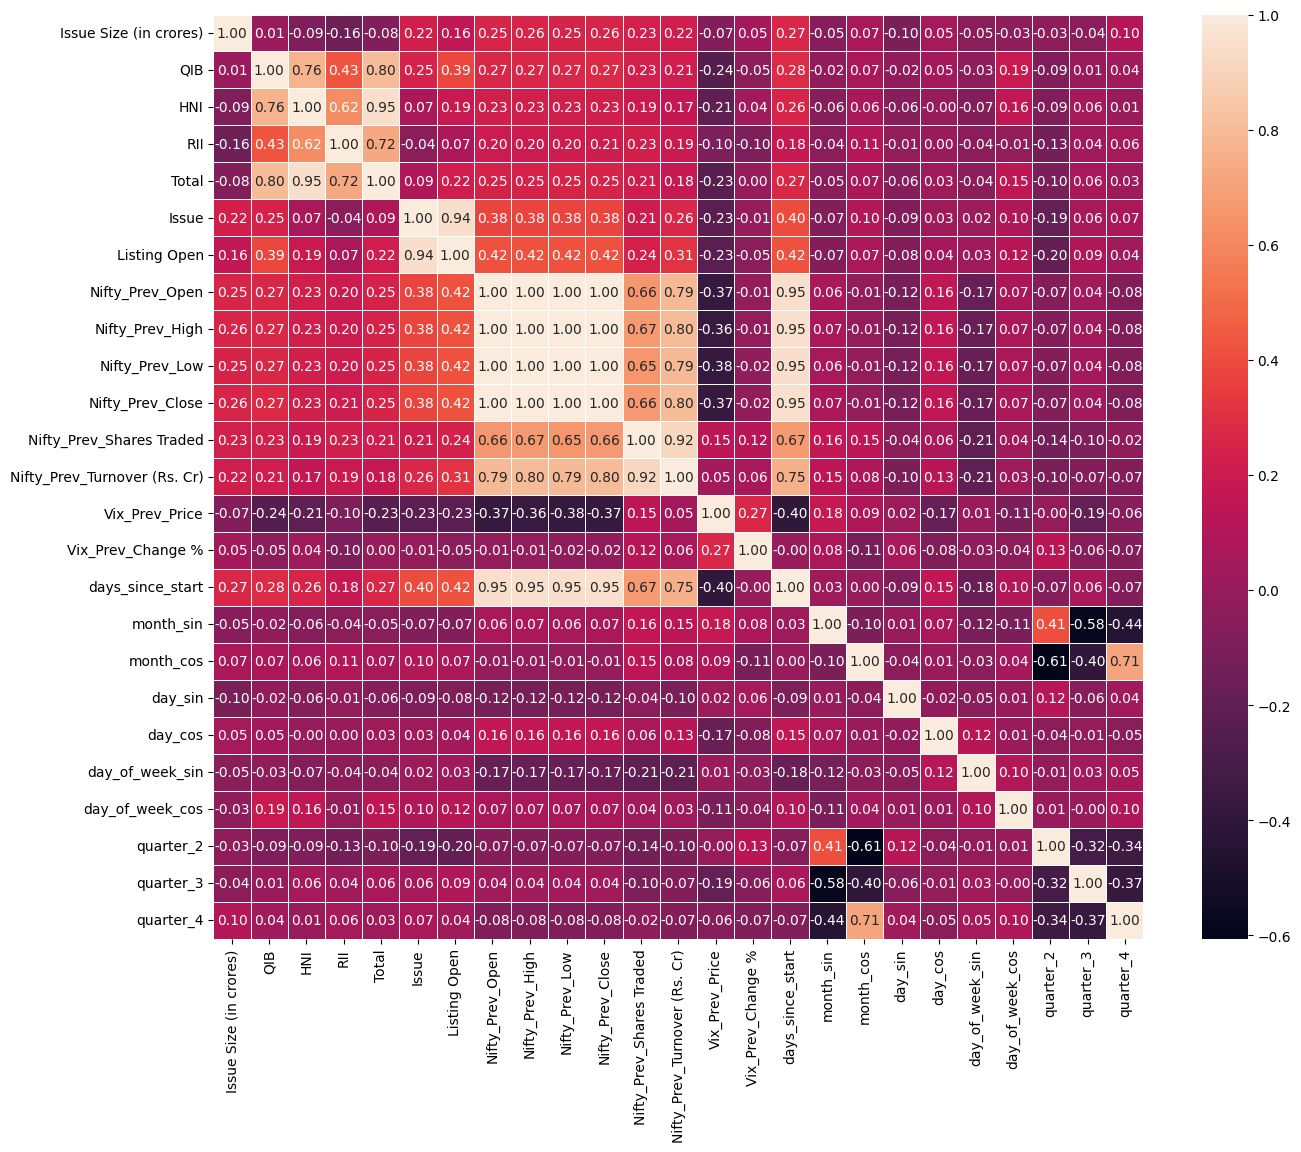

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(real_df.corr(),fmt="0.2f",linewidths=0.5,annot=True)
plt.show()